In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import itertools 
from pathlib import Path
import pdb

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d

#import highlight_text as ht

import intro_plots as ip
import nontrivial as nt
from nontrivial import config

import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/')
DEBUG_AXES = 'off'
#plt.xkcd()


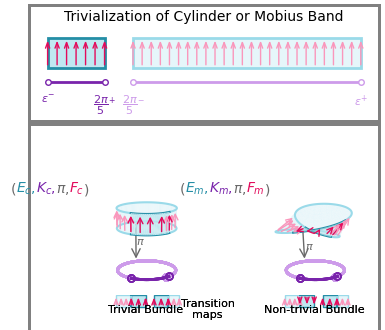

In [3]:

fig = plt.figure(figsize=(3.5,3.5),
                              layout='constrained')
fig1, fig2 = fig.subfigures(2, 1,  hspace=.02, height_ratios=[1,2])

axd = fig2.subplot_mosaic([['cyl', 'mb']])

axd['cyl'] = nt.setup_bundle_axes(axd['cyl'], DEBUG_AXES)
axd['mb'] = nt.setup_bundle_axes(axd['mb'], DEBUG_AXES)


#axd['local'].axis(DEBUG_AXES)

nt.draw_segmented_bundle(axd['cyl'], nt.plot_cylinder, ("Trivial", "c"))
nt.draw_segmented_bundle(axd['mb'], nt.plot_mobius_band, ("Non-trivial", "m")) 

ax = fig1.subplots()

ax.set( ylim=(0, 1), xlim=(config['t'][0]-config['boundary_pad'], 
                                     config['t'][-1]+config['boundary_pad']))
ax.set_title("Trivialization of Cylinder or Mobius Band",fontsize=config['tfs'],
                      color='k')
for (x0, x1), (tc, fc, bc) in [(config['r1'], config['dark_colors']), 
                               (config['r2'], config['light_colors'])]:
    rect = mpatches.Rectangle((x0, config['ry']), height = config['rh'], 
                              width=(x1-x0), 
                              edgecolor=tc, facecolor=pc.lighten(tc,.25), 
                              lw=config['lw'])
    ax.add_patch(rect)
    ax.plot([x0, x1], [config['ly'], config['ly']], lw=config['lw'], 
                      color=bc, marker='o', mfc='white',  markersize=4)

    for x in np.linspace(x0, x1, int(np.round(x1-x0,1)*5) +1):
        at = mpatches.FancyArrowPatch(posA=(x, config['ry']), 
                                      posB=(x, config['ry']+ config['rh']),
                                        arrowstyle='->,head_width=0.15', 
                                      mutation_scale=10, edgecolor=fc)
        ax.add_patch(at)
        
    ax.set(xticks=config['r1'],
                     xticklabels=[r"$\epsilon^{-}$", r"${\dfrac{2\pi}{5}}^{+}$"])
    import matplotlib.ticker as mticker
    
    ax.xaxis.set_minor_locator(mticker.FixedLocator(config['r2']))
    ax.xaxis.set_minor_formatter(mticker.FixedFormatter([r"${\dfrac{2\pi}{5}}^{-}$", r"$\epsilon^{+}$"]))
    
    ax.tick_params('x', which='major', labelcolor=pcd['base'], 
                             length=0, labelsize=config['fs'])
    ax.tick_params('x', which='minor', labelcolor=config['light_base'], 
                             length=0, labelsize=config['fs'])
    ax.tick_params('y', labelleft=False, left=False)
    ax.spines[:].set_visible(False)
    
    


    fig2.text(.51, 0.2, "Transition\nmaps", ha="center", va="center", color='k', 
                      fontsize=config['fs'] )

for subfig in [fig1,fig2]:
    #fig0.frameon=True
    subfig.set_edgecolor('gray')
    subfig.set_linewidth(2)


fig.savefig(paper_path/"transition_maps.png",dpi=200)

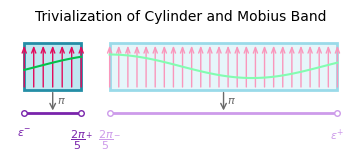

In [4]:

fig, ax = plt.subplots(figsize=(3.5, 1.5), layout='constrained')

ax.set( ylim=(0, 1), xlim=(config['t'][0]-config['boundary_pad'], 
                                     config['t'][-1]+config['boundary_pad']))
ax.set_title("Trivialization of Cylinder and Mobius Band",fontsize=config['tfs'],
                      color='k')
for (x0, x1), (tc, fc, bc), sc in [(config['r1'], config['dark_colors'], pcd['section']), 
                               (config['r2'], config['light_colors'], pc.lighten(pcd['section'], .4))]:
    rect = mpatches.Rectangle((x0, config['ry']), height = config['rh'], 
                              width=(x1-x0), 
                              edgecolor=tc, facecolor=pc.lighten(tc,.25), 
                              lw=config['lw'])
    ax.add_patch(rect)
    n = 100
    x = np.linspace(x0, x1, n)
    y = np.sin(x)*config['rh']*.25 + (config['ry'] + config['rh']/2)
    ax.plot(x, y, color=sc)

    ax.plot([x0, x1], [config['ly'], config['ly']], lw=config['lw'], 
                      color=bc, marker='o', mfc='white',  markersize=4)

    xmid = x0 + (x1-x0)/2
    fp = mpatches.FancyArrowPatch(posA=(xmid, config['ry']),  posB=(xmid, config['ly']), arrowstyle=config['aws'], mutation_scale=config['ms']-5, 
                               color=config['bundle_color'])
    ax.add_artist(fp)
    ax.annotate(text=r"$\pi$", xy=(1.2,.5), xycoords=fp,  fontsize=config['fs'],
                   color=config['bundle_color'], ha='left', va='center')

    for x in np.linspace(x0, x1, int(np.round(x1-x0,1)*5) +1):
        at = mpatches.FancyArrowPatch(posA=(x, config['ry']), 
                                      posB=(x, config['ry']+ config['rh']),
                                        arrowstyle='->,head_width=0.15', 
                                      mutation_scale=10, edgecolor=fc)
        ax.add_patch(at)
        
    ax.set(xticks=config['r1'], xticklabels=[r"$\epsilon^{-}$", r"${\dfrac{2\pi}{5}}^{+}$"])

    
    import matplotlib.ticker as mticker
    
    ax.xaxis.set_minor_locator(mticker.FixedLocator(config['r2']))
    ax.xaxis.set_minor_formatter(mticker.FixedFormatter([r"${\dfrac{2\pi}{5}}^{-}$", r"$\epsilon^{+}$"]))
    
    ax.tick_params('x', which='major', labelcolor=pcd['base'], 
                             length=0, labelsize=config['fs'])
    ax.tick_params('x', which='minor', labelcolor=config['light_base'], 
                             length=0, labelsize=config['fs'])
    ax.tick_params('y', labelleft=False, left=False)
    ax.spines[:].set_visible(False)

fig.savefig(paper_path/"cyl_mob.png", dpi=300)


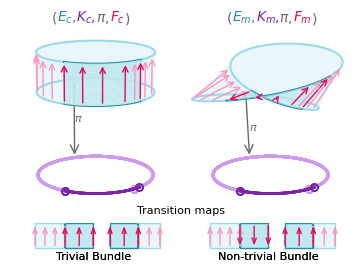

In [23]:
fig, axd = plt.subplot_mosaic([['cyl', 'mb']], figsize=(3.5, 3.5), layout='constrained')


axd['cyl'] = nt.setup_bundle_axes(axd['cyl'], DEBUG_AXES)
axd['mb'] = nt.setup_bundle_axes(axd['mb'], DEBUG_AXES)

nt.draw_segmented_bundle(axd['cyl'], nt.plot_cylinder, ("Trivial", "c"))
nt.draw_segmented_bundle(axd['mb'], nt.plot_mobius_band, ("Non-trivial", "m")) 


fig.text(.5,.225, "Transition maps", ha="center", va="center", color='k', fontsize=config['fs'] )
fig.savefig(paper_path/"transition_maps.png", dpi=300)

In [12]:
def make_trivializations(fig=None):

    if fig==None:
        fig, ax = plt.subplots(figsize=(3.5, 1.5), layout='constrained')
    else:
        ax = fig.subplots()

    
    ax.set( ylim=(0, 1), xlim=(config['t'][0]-config['boundary_pad'], 
                                         config['t'][-1]+config['boundary_pad']))
    for i, ((x0, x1), (tc, fc, bc), sc) in enumerate([(config['r1'], config['dark_colors'], pcd['section']), 
                                   (config['r2'], config['dark_colors'], pc.lighten(pcd['section'], 1))]):
        rect = mpatches.Rectangle((x0, config['ry']), height = config['rh'], 
                                  width=(x1-x0), 
                                  edgecolor=tc, facecolor=pc.lighten(tc,.25), 
                                  lw=config['lw'])
        ax.add_patch(rect)
        n = 100
        x = np.linspace(x0, x1, n)
        y = np.sin(x)*config['rh']*.25 + (config['ry'] + config['rh']/2)
        ax.plot(x, y, color=sc)
    
        ax.plot([x0, x1], [config['ly'], config['ly']], lw=config['lw'], 
                          color=bc, marker='o', mfc='white',  markersize=4)
    
        xmid = x0 + (x1-x0)/2
        fp = mpatches.FancyArrowPatch(posA=(xmid, config['ry']),  posB=(xmid, config['ly']), arrowstyle=config['aws'], mutation_scale=config['ms']-5, 
                                   color=config['bundle_color'])
        ax.add_artist(fp)
        ax.annotate(text=r"$\pi$", xy=(1.2,.5), xycoords=fp,  fontsize=config['fs'],
                       color=config['bundle_color'], ha='left', va='center')
    
        for x in np.linspace(x0, x1, int(np.round(x1-x0,1)*3) +1):
            at = mpatches.FancyArrowPatch(posA=(x, config['ry']), 
                                          posB=(x, config['ry']+ config['rh']),
                                            arrowstyle='->,head_width=0.15', 
                                          mutation_scale=10, edgecolor=fc)
            ax.add_patch(at)
            

    xticks = np.hstack([config['r1'], config['r2']])
    pad = .15
    xticks[1]-=pad
    xticks[2]+=pad*2
    ax.set(xticks=xticks, xticklabels=[r"$\epsilon^{-}$", r"${\dfrac{2\pi}{5}}^{+}$", r"${\dfrac{2\pi}{5}}^{-}$", r"$\epsilon^{+}$"])


    ax.tick_params('x', which='major', labelcolor=pcd['base'], length=0, labelsize=config['fs'])
    
    ax.tick_params('y', labelleft=False, left=False)
    ax.spines[:].set_visible(False)
    ax.set_title("arbitrary trivialization")


In [13]:
def make_fb(fig=None):
    if fig==None:
        fig, ax = plt.subplots(figsize=(1.5, 1.5), layout='constrained')
    else:
        ax = fig.subplots()

    ax.set( ylim=(0, 1), xlim=(config['t'][0]-config['boundary_pad'], 
                                         config['t'][-1]+config['boundary_pad']))
    
    (tc, fc, bc)  = config['dark_colors']
    
    x0 = 0
    x1 = 2*np.pi
    
    rect = mpatches.Rectangle((x0, config['ry']), height = config['rh'], 
                              width=(x1-x0), 
                              edgecolor=tc, facecolor=pc.lighten(tc,.25), 
                              lw=config['lw'])
    ax.add_patch(rect)
    
    n = 100
    x = np.linspace(x0, x1, n)
    y = np.sin(x)*config['rh']*.25 + (config['ry'] + config['rh']/2)
    ax.plot(x, y, color=pcd['section'])
        
    ax.plot([x0, x1], [config['ly'], config['ly']], lw=config['lw'], 
                      color=bc, marker='o', mfc='white',  markersize=4)
    
    xmid = np.pi/2
    fp = mpatches.FancyArrowPatch(posA=(xmid, config['ry']),  posB=(xmid, config['ly']), arrowstyle=config['aws'], mutation_scale=config['ms']-5, 
                               color=config['bundle_color'])
    ax.add_artist(fp)
    ax.annotate(text=r"$\pi$", xy=(1.2,.5), xycoords=fp,  fontsize=config['fs'],
                   color=config['bundle_color'], ha='left', va='center')
    
    xmid = x0 + (x1-x0)*.75
    sp = mpatches.FancyArrowPatch(posA=(xmid, config['ry']),  posB=(xmid, config['ly']), arrowstyle=config['aws'], mutation_scale=config['ms']-5, 
                               color=config['bundle_color'])
    ax.add_artist(fp)
    ax.annotate(text=r"$\tau$", xy=(1.2,.5), xycoords=fp,  fontsize=config['fs'],
                   color=config['bundle_color'], ha='left', va='center')
    
    
    for x in np.linspace(x0, x1, int(np.round(x1-x0,1)*2) +1):
        at = mpatches.FancyArrowPatch(posA=(x, config['ry']), 
                                      posB=(x, config['ry']+ config['rh']),
                                        arrowstyle='->,head_width=0.15', 
                                      mutation_scale=10, edgecolor=fc)
        ax.add_patch(at)
        
    ax.set(xticks=(x0, 2*np.pi/5, x1), xticklabels=[r"$0$", r"${\dfrac{2\pi}{5}}^{+}$" , r"$2\pi$"])
    
    
    import matplotlib.ticker as mticker
    
    
    
    ax.tick_params('x', which='major', labelcolor=pcd['base'], 
                             length=0, labelsize=config['fs'])
    ax.tick_params('y', labelleft=False, left=False)
    ax.spines[:].set_visible(False)
    ax.set_title("fiber bundle")
    #fig.savefig(paper_path/"cyl_mob.png", dpi=300)


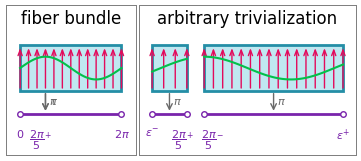

In [14]:

fig = plt.figure(figsize=(3.5, 1.5),
                              layout='constrained')
fig1, fig2 = fig.subfigures(1, 2, width_ratios=[1.5, 2.5])

fig
make_fb(fig1)

make_trivializations(fig2)

for subfig in [fig1,fig2]:
    #fig0.frameon=True
    subfig.set_edgecolor('gray')
    subfig.set_linewidth(.5)
fig.savefig(paper_path/"fb.png")